In [1]:
!date

Tue Mar 19 11:45:18 EDT 2024


In [2]:
pwd

'/mmfs1/data/aglinska/BC-sim/Code'

In [12]:
%%time
print('importing')
import ants
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

importing


/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


CPU times: user 1.13 s, sys: 566 ms, total: 1.7 s
Wall time: 43.2 s


In [4]:
def plot_brain(mat):
    #mat = mat-mat[0,0,0]
    #mat = (mat-mat.min()) / (mat.max()-mat.min())
    #mat = (mat-mat.mean()) / mat.std()
    #vmin = mat.min()*.25
    #vmax = mat.max()*.75
    mat = mat.astype(np.float32)
    vmin = 0-abs(mat.max())
    vmax = 0+abs(mat.max())
    #print((mat.min(),mat.max()))
    #print(mat[0,0,0])
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1);plt.imshow(np.rot90(mat[:,:,32]),cmap='bwr',vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([]);plt.colorbar(shrink=.48)
    plt.subplot(1,3,2);plt.imshow(np.rot90(mat[:,32,:]),cmap='bwr',vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([]);plt.colorbar(shrink=.48)
    plt.subplot(1,3,3);plt.imshow(np.rot90(mat[32,:,:]),cmap='bwr',vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([]);plt.colorbar(shrink=.48)

In [13]:
temp = np.load('../Misc/Atlas_brain_2mm_64iso.npy')

In [5]:
data = np.load('../Data/synth-data-01.npy')
data.shape

(1000, 64, 64, 64)

In [6]:
df = pd.read_csv('../Data/synth-data-01.csv')
df

,Unnamed: 0,subID,dx,path,td_sphere_1,td_sphere_2,adhd_sphere_1,adhd_sphere_2,td_tx,adhd_tx
0,0,sub-0000,1,../synth-data-01/ADHD-sub-0000.nii.gz,24.636458,20.592753,12.834489,10.035014,4.043705,2.799475
1,1,sub-0001,1,../synth-data-01/ADHD-sub-0001.nii.gz,15.945992,12.212052,11.011581,11.316208,3.733940,-0.304627
2,2,sub-0002,1,../synth-data-01/ADHD-sub-0002.nii.gz,19.401910,15.016307,12.606499,14.643771,4.385604,-2.037272
3,3,sub-0003,1,../synth-data-01/ADHD-sub-0003.nii.gz,31.737532,26.812256,10.869074,13.482636,4.925275,-2.613562
4,4,sub-0004,1,../synth-data-01/ADHD-sub-0004.nii.gz,24.533527,25.962776,6.159082,6.337349,-1.429249,-0.178267
...,...,...,...,...,...,...,...,...,...,...
995,995,sub-0495,0,../synth-data-01/TD-sub-0495.nii.gz,29.806246,31.775410,0.000000,0.000000,-1.969164,0.000000
996,996,sub-0496,0,../synth-data-01/TD-sub-0496.nii.gz,14.683680,13.065503,0.000000,0.000000,1.618177,0.000000
997,997,sub-0497,0,../synth-data-01/TD-sub-0497.nii.gz,18.065294,13.891190,0.000000,0.000000,4.174104,0.000000
998,998,sub-0498,0,../synth-data-01/TD-sub-0498.nii.gz,14.391185,19.336634,0.000000,0.000000,-4.945449,0.000000


In [7]:
patients = df['dx'].values==1
controls = df['dx'].values==0

In [8]:
diffs = data[patients,:,:,:]-data[controls,:,:,:]

In [14]:
#diffs2 = data[controls,:,:,:]-data[controls,:,:,:].mean(axis=0)
diffs2 = data[controls,:,:,:]-temp

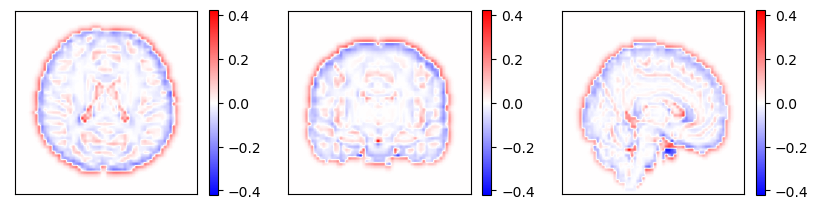

In [15]:
plot_brain(diffs2.mean(axis=0))

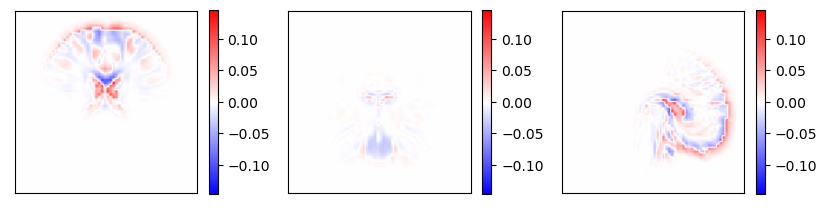

In [16]:
plot_brain(diffs.mean(axis=0))